# Elbow method (L-3)

Import the relevant libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

Load the data

In [34]:
data = pd.read_csv("3.01.+Country+clusters.csv")

In [35]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


Map the data

In [36]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


Select the features

In [37]:
x = data_mapped.iloc[:,1:4]

In [38]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


# Clustering

In [39]:
kmeans =KMeans(3) #Number of cluster we are wanting

In [40]:
kmeans.fit(x)

KMeans(n_clusters=3)

Clustering Results

In [41]:
identified_clustering = kmeans.fit_predict(x)
identified_clustering

array([0, 0, 1, 1, 1, 2])

In [43]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clustering
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


<function matplotlib.pyplot.show(*args, **kw)>

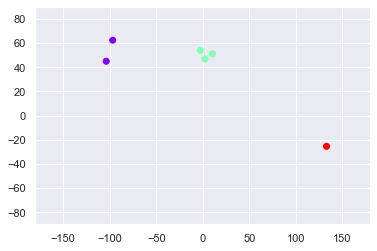

In [44]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c = data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# Elbow method

In [45]:
# Selecting the number of clusters
#wcss
kmeans.inertia_

290.10523333333333

In [47]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

The Elbow Method

Text(0, 0.5, 'With-in cluster sum of squares')

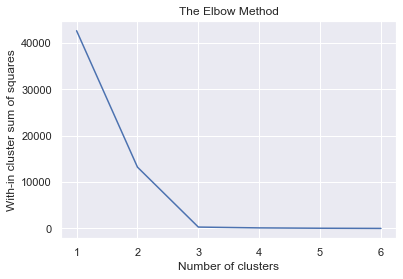

In [50]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('With-in cluster sum of squares')

Note- So 3 cluster is best to choose as there is no notable elbow to find after this and cluster size of 2 is semioptimal 